# Course Data Analysis using Python and matplotlib.pyplot
Here we show how to do some analysis of Brandeis course data from 2004 to 2021 using matplotlib.pyplt to plot the results.

References:
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py


In [65]:
import json
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Reading in the data
We have a data set of all Brandeis courses from 2004-2021
Let's load it into a list of dictionaries and look at the first entry courses[0]

In [79]:
with open("data/courses.csv",'r') as csvfile:
    reader = csv.DictReader(csvfile)
    courses = [row for row in reader]
    csvfile.close()
print(len(courses))
courses[0]

35206


{'subj': 'NEJS',
 'num': '188',
 'suf': 'A',
 'format': 'LEC',
 'term': 'Fall 2004',
 'code': '1043',
 'inst': 'Levy, Avigdor',
 'title': 'RISE/DECLINE:OTTOMAN EMP',
 'sec': '1',
 'enr': '32'}

# Calculating enrollments by term
Next lets look at the terms and the calculate the enrollments for each term
which we can then plot in various ways

In [83]:
vals = sorted({(c['code'],c['term']) for c in courses})
codes = [t[0] for t in vals]
terms = [t[1] for t in vals]

print('len=',len(vals))
print('....')

print('codes = ',codes)
print('....')

enrolled_by_term = [sum([int(c['enr']) for c in courses if c['code']==t]) for t in codes]
print('number enrolled by term=',len(enrolled_by_term))
print('....')
print(enrolled_by_term)


len= 51
....
codes =  ['1043', '1051', '1052', '1053', '1061', '1062', '1063', '1071', '1072', '1073', '1081', '1082', '1083', '1091', '1092', '1093', '1101', '1102', '1103', '1111', '1112', '1113', '1121', '1122', '1123', '1131', '1132', '1133', '1141', '1142', '1143', '1151', '1152', '1153', '1161', '1162', '1163', '1171', '1172', '1173', '1181', '1182', '1183', '1191', '1192', '1193', '1201', '1202', '1203', '1211', '1212']
....
number enrolled by term= 51
....
[18275, 17486, 1602, 19379, 17760, 1486, 20007, 18638, 1515, 20074, 18579, 1532, 19849, 18783, 1528, 20671, 19969, 1841, 21029, 20508, 1878, 21894, 21293, 1863, 22134, 21013, 2189, 22357, 21498, 2253, 23151, 21905, 2197, 22443, 20898, 2481, 22350, 20848, 2230, 22190, 20832, 2110, 23093, 21215, 1827, 23991, 21807, 2204, 22849, 20546, 592]


# Object-Oriented Style of plotting
There are two approaches to using matplotlib to plot. 
The first is the object-oriented style shown below, where we explicitly create the figure and axes
and use their methods to do the plotting.

'done'

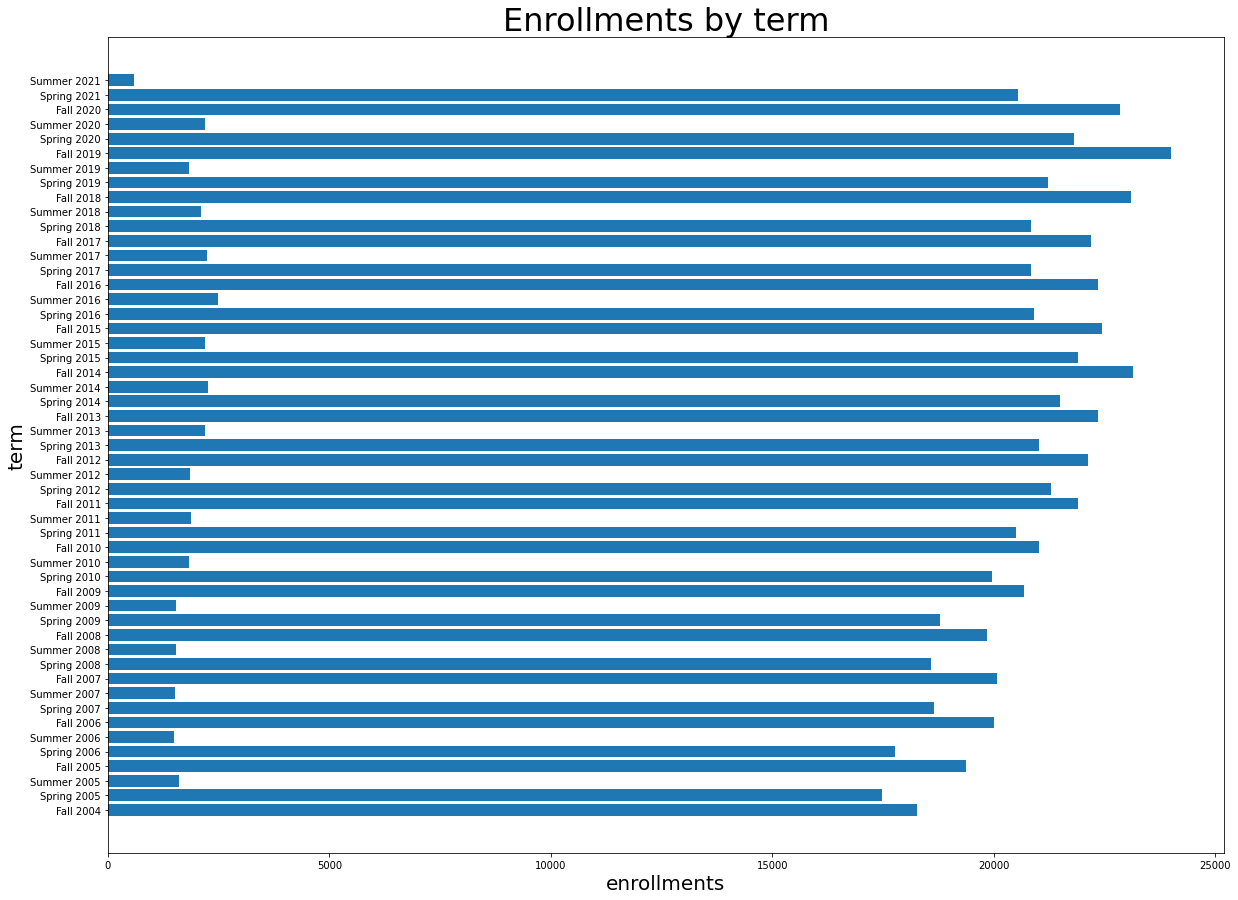

In [93]:
fig,ax = plt.subplots(figsize=(20,15))

ax.barh(terms, enrolled_by_term)
ax.set_xlabel("enrollments",fontsize=20)
ax.set_ylabel("term",fontsize=20)
ax.set_title("Enrollments by term",fontsize=32)
fig.savefig("images/enrollments_by_term.png")
'done'

# Pyplot approach
The other approach is to let pyplot create the figure and axes for you and to do everything with calls to pyplot methods. It is good to know both approaches so you can understand matplotlib code when you see it.

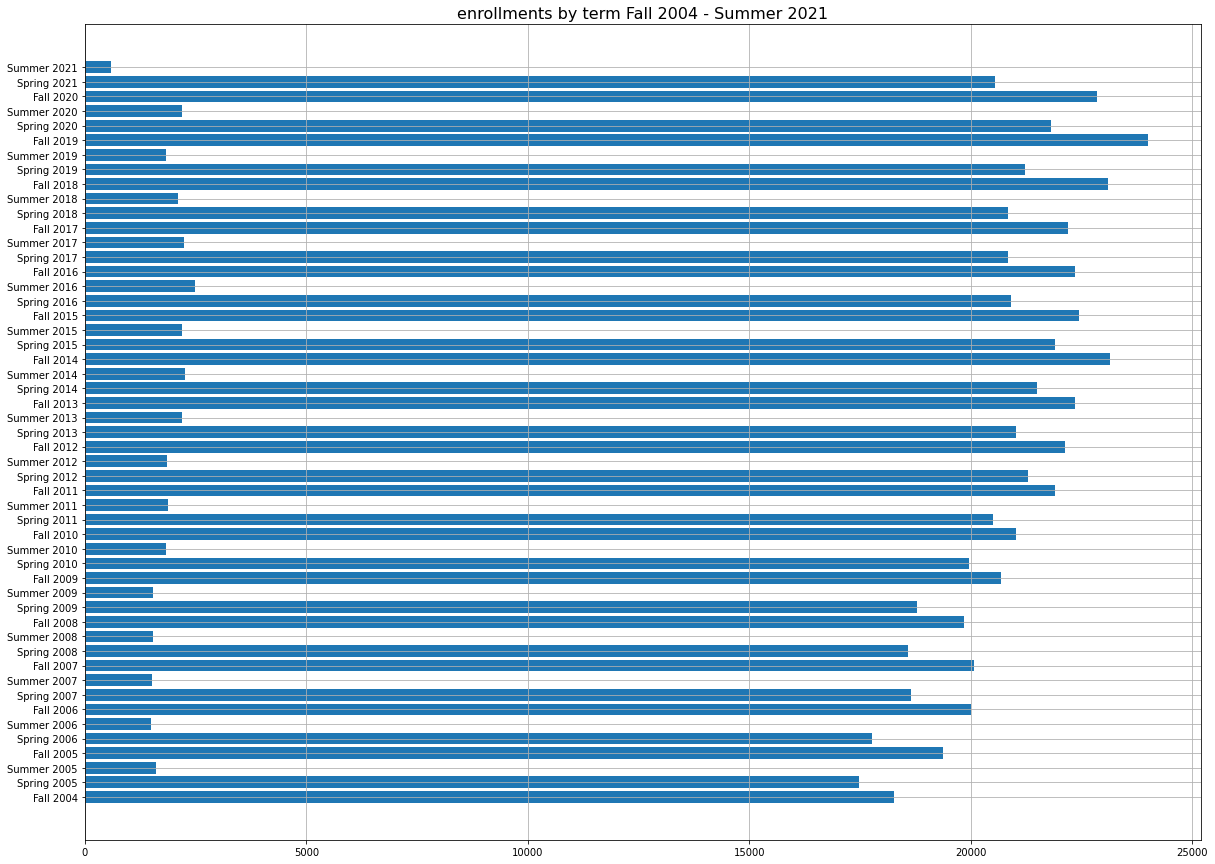

In [85]:

plt.figure(figsize=(20,15))
plt.barh(terms,enrolled_by_term)
plt.grid()
plt.title("enrollments by term Fall 2004 - Summer 2021",fontsize=16)
plt.savefig("enrollments by term")

# Enrollments by academic year
Next lets fold the fall, spring, and summer semesters together and plot by academic year!

In [46]:
def academic_year(term):
    ''' returns the academic year given the term, e.g. 1173, 1181, 1182 all go to 2017-18 '''
    year1 = int(term[1:-1])
    year2 = year1
    semester = term[-1]
    if (semester=="3"):
        year2 = year1+1
    else:
        year1 = year2-1
    return "20%02d-%02d"%(year1,year2)

academic_years = [academic_year(t) for t in codes]
print(academic_years)
academic_years = academic_years[0::3]
print(academic_years)

['2004-05', '2004-05', '2004-05', '2005-06', '2005-06', '2005-06', '2006-07', '2006-07', '2006-07', '2007-08', '2007-08', '2007-08', '2008-09', '2008-09', '2008-09', '2009-10', '2009-10', '2009-10', '2010-11', '2010-11', '2010-11', '2011-12', '2011-12', '2011-12', '2012-13', '2012-13', '2012-13', '2013-14', '2013-14', '2013-14', '2014-15', '2014-15', '2014-15', '2015-16', '2015-16', '2015-16', '2016-17', '2016-17', '2016-17', '2017-18', '2017-18', '2017-18', '2018-19', '2018-19', '2018-19', '2019-20', '2019-20', '2019-20', '2020-21', '2020-21', '2020-21']
['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21']


In [94]:

enrolled_by_year = [sum([int(c['enr']) for c in courses if academic_year(c['code'])==year]) for year in academic_years]
print(enrolled_by_year)

[37363, 38625, 40160, 40185, 40160, 42481, 43415, 45050, 45336, 46108, 47253, 45822, 45428, 45132, 46135, 48002, 43987]


'done'

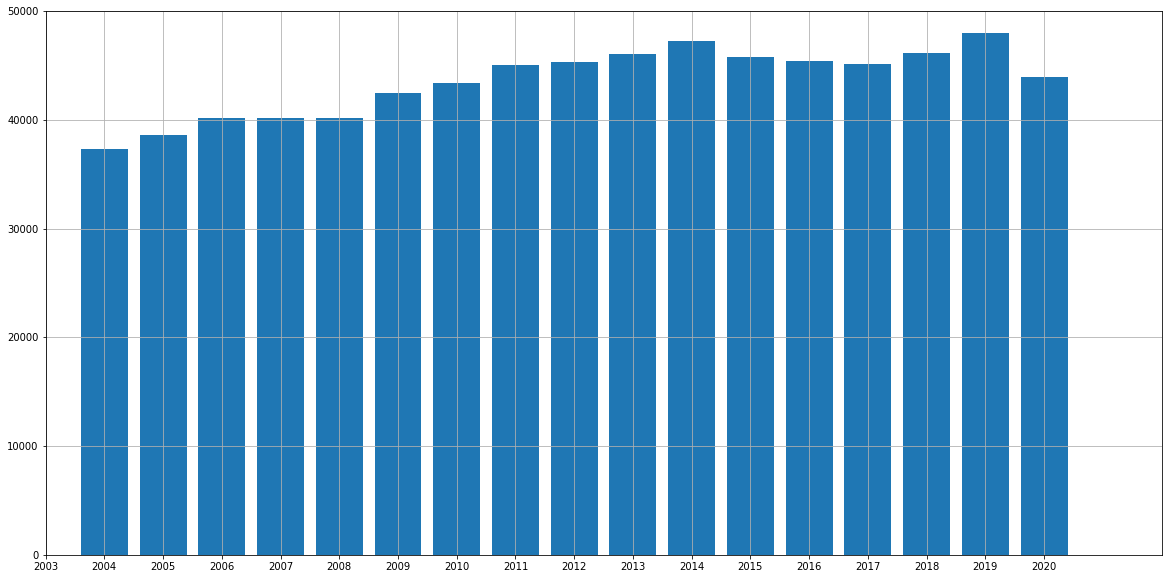

In [97]:
plt.figure(figsize=(20,10))
#plt.plot(range(2004,2021),enrolled_by_year)
plt.bar(range(2004,2021),enrolled_by_year)
plt.grid()
plt.xticks(range(2003,2021))
plt.axis([2003,2022,0,50000])
'done'